<a href="https://colab.research.google.com/github/Kalisha1234/My-Projects/blob/main/INDIANHOUSESPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/train.csv')

<ipython-input-3-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

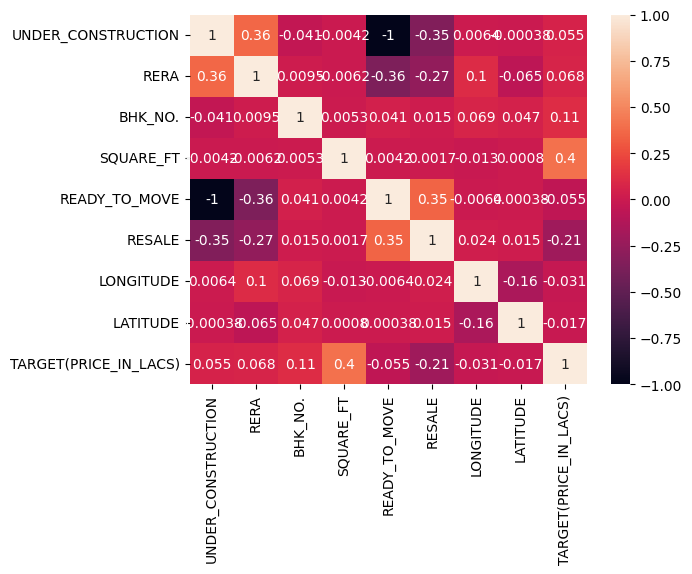

In [3]:
sns.heatmap(data.corr(), annot = True)

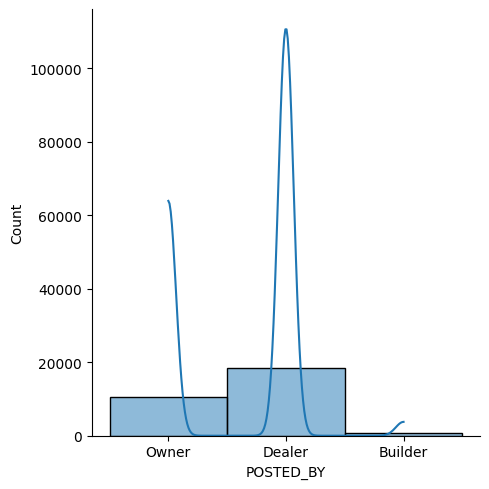

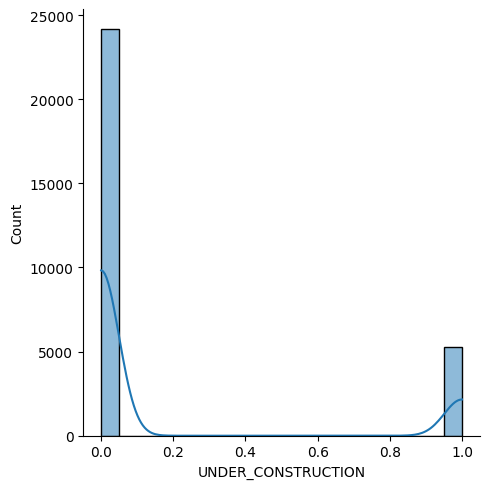

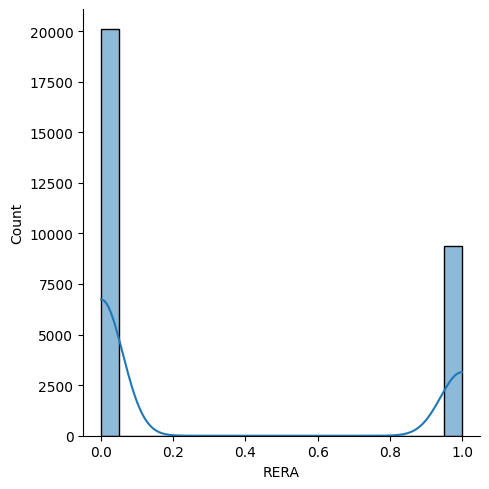

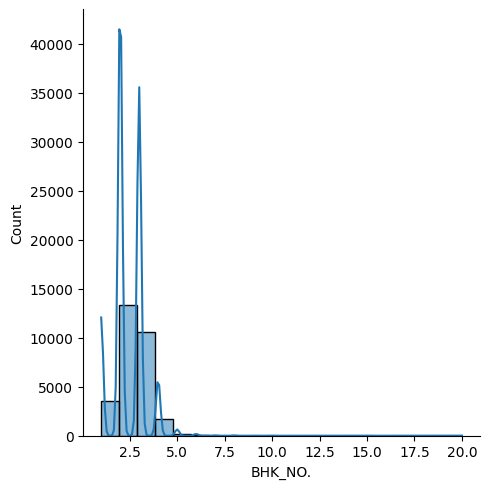

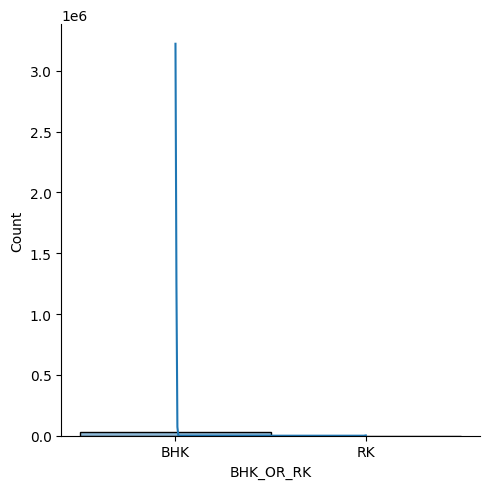

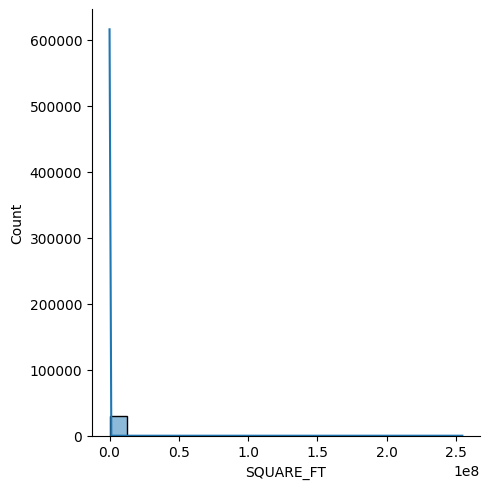

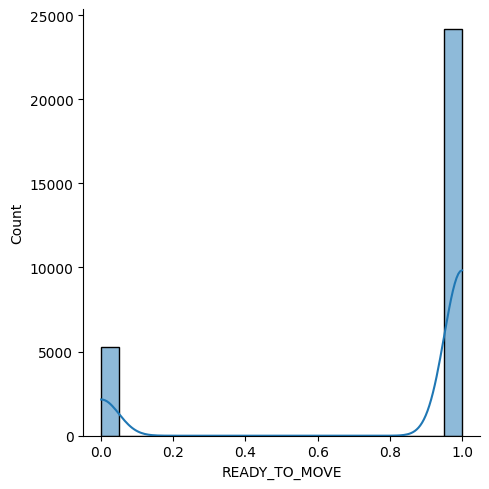

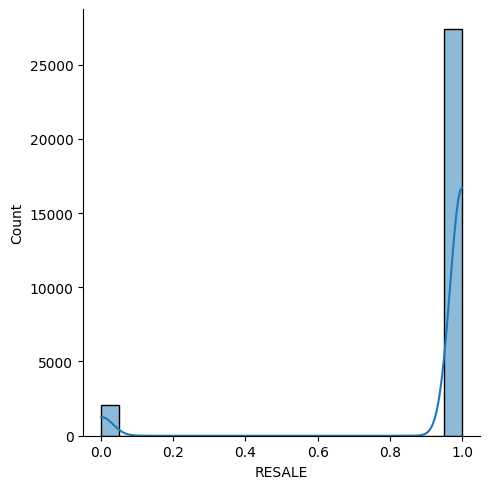

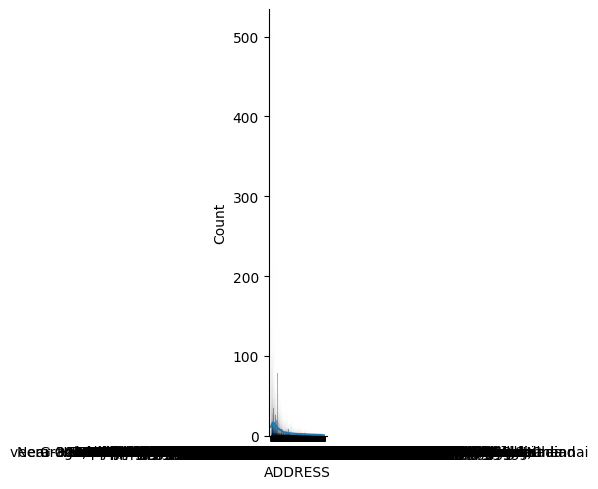

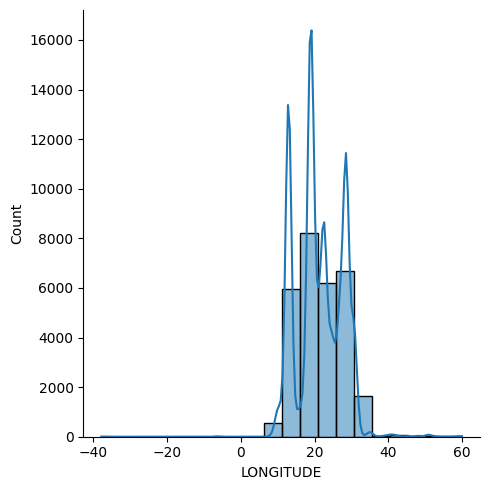

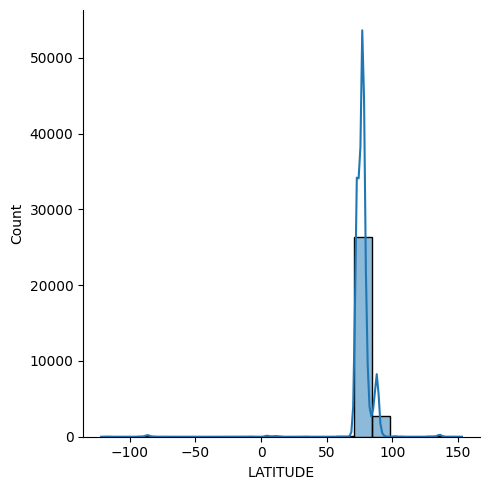

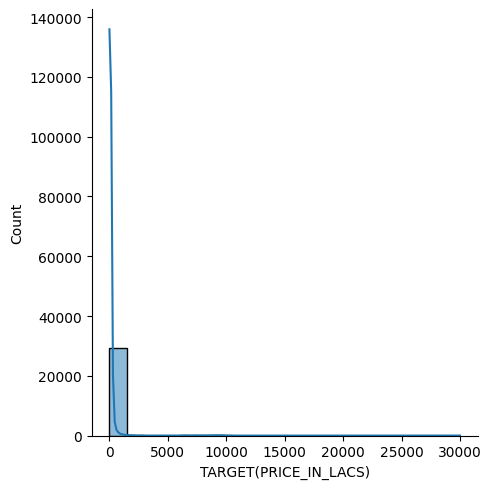

In [7]:
for column in data.columns:
  sns.displot(data[column], kde = True, bins = 20)
  plt.show()

In [9]:
numerical_features = data.select_dtypes(include = [np.number])
numerical_features

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


In [10]:
numerical_features = data.select_dtypes(include = [np.number])
correlation =numerical_features.corr()
print(correlation ['TARGET(PRICE_IN_LACS)'].sort_values(ascending= False), '\n')

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64 



In [13]:

x = data[[ 'BHK_NO.', 'UNDER_CONSTRUCTION', 'LATITUDE', 'LONGITUDE', 'READY_TO_MOVE', 'RESALE']]
y = data ['TARGET(PRICE_IN_LACS)']


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [16]:
x_train

,BHK_NO.,UNDER_CONSTRUCTION,LATITUDE,LONGITUDE,READY_TO_MOVE,RESALE
17274,2,0,76.963756,28.408144,1,0
13156,3,1,77.481711,28.429614,0,0
9648,1,0,72.610240,21.750834,1,1
25542,3,0,77.711773,12.923545,1,1
24651,3,0,72.859800,19.235000,1,1
...,...,...,...,...,...,...
4075,3,1,77.434566,28.493232,0,1
16145,3,0,86.158521,22.830053,1,1
6582,1,0,77.357227,28.394375,1,1
5199,2,0,73.200000,22.300000,1,1


In [17]:

y_train

17274     70.0
13156    120.0
9648      10.0
25542    110.0
24651    280.0
         ...  
4075      67.1
16145     48.0
6582      15.0
5199      17.0
17318    450.0
Name: TARGET(PRICE_IN_LACS), Length: 26505, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:

pred = model.predict(x_test)

In [22]:

pred

array([106.00081618, 194.17379827,  88.8718736 , ..., 105.76181038,
       534.35013948, 178.2455091 ])

In [23]:

y_test

22234     52.5
13406     84.0
14824     76.0
4454     320.0
12774     10.4
         ...  
10453     38.0
3174     280.0
19638     55.0
1989     100.0
17279    170.0
Name: TARGET(PRICE_IN_LACS), Length: 2946, dtype: float64

In [24]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)

In [25]:

mse


252129.74588754517